<a href="https://colab.research.google.com/github/lucianosilva-github/mid/blob/main/QUANTUM%20COMPUTING-MIDTERM2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>INTRODUCTION TO QUANTUM COMPUTING - MIDTERM - 04 APRIL 20</b>
#### <b> Prof. Luciano Silva </b>

#### <b> NAME: Enricco Gemha </b>

In [1]:
#DOWNGRADING QISKIT TO 0.46.1

# !pip uninstall -y qiskit

In [2]:
# !pip install qiskit==0.46.1
#PLEASE, IGNORE THE RED WARNINGS...

In [3]:
#IMPORTANT: RESTART THE KERNEL (Kernel Menu --> Restart Kernel..)

In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info.operators import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import warnings

/var/folders/x3/bbk8nj6s67s9nv5gvt6q6gxh0000gn/T/ipykernel_59296/3181631047.py:6: DeprecationWarning: qiskit.tools.jupyter is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.jupyter import *


<b>Problem 1. (2.0 points)</b> Let us consider these two quantum circuits:

In [5]:
#CIRCUIT 1
qc1 = QuantumCircuit(2)
qc1.cx(1,0)
display(qc1.draw())

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

In [6]:
#CIRCUIT 2
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.h(1)
qc2.cx(0,1)
qc2.h(0)
qc2.h(1)
display(qc2.draw()) 

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

Show that they are equivalent.

In [7]:
from qiskit.quantum_info import Operator

op1 = Operator(qc1)
op2 = Operator(qc2)

print(op1.equiv(op2))  # Will print True

True


<span style="color:lightblue">The result of this evalution is method is that they are equivalent</span>

<b>Problem 2. (2.0 points) </b> The quantum circuit below swaps the values ​​of the quantum registers q [0] and q [1]:

In [8]:
q=QuantumRegister(2,name='q')
qc = QuantumCircuit(q)
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

/var/folders/x3/bbk8nj6s67s9nv5gvt6q6gxh0000gn/T/ipykernel_59296/1554248982.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend("statevector_simulator")
/var/folders/x3/bbk8nj6s67s9nv5gvt6q6gxh0000gn/T/ipykernel_59296/1554248982.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  statevector = execute(qc, backend=backend).result().get_statevector()


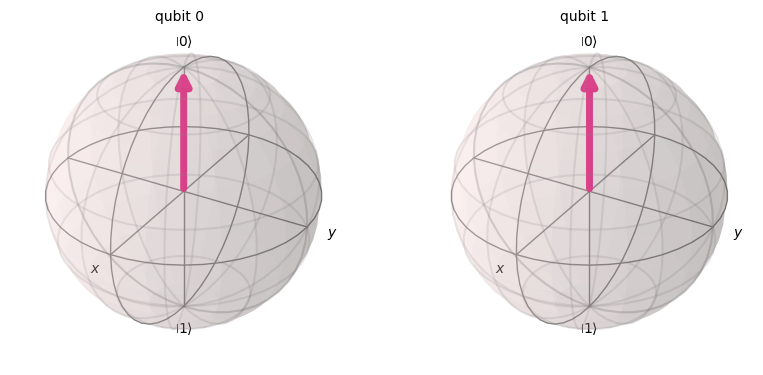

In [9]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

Use this code snippet to evaluate $2^{3}$, without using any arithmetic operation.

In [10]:
q=QuantumRegister(4,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.cx(q[2],q[1])
qc.cx(q[1],q[2])
qc.cx(q[2],q[1])
qc.cx(q[3],q[2])
qc.cx(q[2],q[3])
qc.cx(q[3],q[2])
qc.draw()

┌───┐┌───┐     ┌───┐                              
q_0: ┤ X ├┤ X ├──■──┤ X ├──────────────────────────────
     └───┘└─┬─┘┌─┴─┐└─┬─┘┌───┐     ┌───┐               
q_1: ───────■──┤ X ├──■──┤ X ├──■──┤ X ├───────────────
               └───┘     └─┬─┘┌─┴─┐└─┬─┘┌───┐     ┌───┐
q_2: ──────────────────────■──┤ X ├──■──┤ X ├──■──┤ X ├
                              └───┘     └─┬─┘┌─┴─┐└─┬─┘
q_3: ─────────────────────────────────────■──┤ X ├──■──
                                             └───┘

/var/folders/x3/bbk8nj6s67s9nv5gvt6q6gxh0000gn/T/ipykernel_59296/1554248982.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  statevector = execute(qc, backend=backend).result().get_statevector()


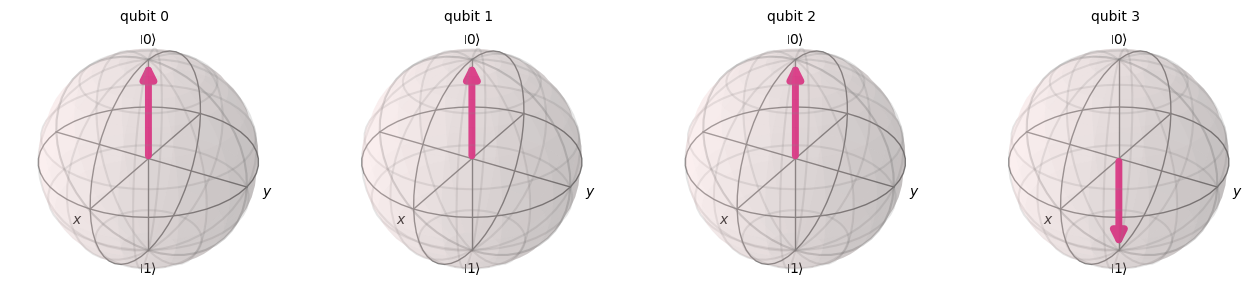

In [11]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

<b>Problem 3. (3.0 points)</b> Build and draw a quantum circuit that applies the operator below on 2-qubits, without using the Operator class.

$
\displaystyle 
\text{Operator = }
\begin{bmatrix}
0 & 0 & \tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}}  \\
\tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\end{bmatrix}
$

<span style="color:lightblue">**Building the quantum circuit**</span>

In [12]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

q = QuantumRegister(2, name='q')
qc1 = QuantumCircuit(q)

# Controlled-SWAP 
qc1.h(1)
qc1.cx(0, 1)
qc1.tdg(1)
qc1.cx(0, 1)
qc1.t(1)
qc1.h(1)
qc1.cx(0, 1)
qc1.tdg(1)
qc1.cx(0, 1)

# Global Phase Shift
qc1.p(-np.pi/4, 0) 

# Controlled Phase Shift
qc1.cz(0, 1)  

qc1.draw()

┌─────────┐   
q_0: ───────■───────────■──────────────■───────────■──┤ P(-π/4) ├─■─
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌───┐┌─┴─┐┌─────┐┌─┴─┐└─────────┘ │ 
q_1: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ H ├┤ X ├┤ Tdg ├┤ X ├────────────■─
     └───┘└───┘└─────┘└───┘└───┘└───┘└───┘└─────┘└───┘

<span style="color:lightblue">**Comparing the answer with am equivalent Operator class**</span>

In [13]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

operator_matrix = np.array([
    [0, 0, 1/np.sqrt(2), 1/np.sqrt(2)],
    [0, 0, 1/np.sqrt(2), -1/np.sqrt(2)],
    [1/np.sqrt(2), 1/np.sqrt(2), 0, 0],
    [1/np.sqrt(2), -1/np.sqrt(2), 0, 0]])

custom_operator = Operator(operator_matrix)

qc2 = QuantumCircuit(2)  
qc2.append(custom_operator, [0, 1]) 
qc2.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

In [14]:
from qiskit.quantum_info import Operator

operator1 = Operator(qc1)
operator2 = Operator(qc2)

is_equivalent = operator1.equiv(operator2)
print(is_equivalent)  # Will print True if equivalent

False


<span style="color:lightblue">This allow me to conclude that the circuit `qc1` is the correct.</span>

<b> Problem 4. (3.0 points) </b> We say that a number is <b>double even</b> is when it is divisible by 4.  Build a quantum circuit that receives a 4-bit binary number and returns 1 if the number is double even and 0, otherwise.

In [15]:
import qiskit

def even_odd_circuit(d):
    """Creates a quantum circuit for the Even-Odd Algorithm.

    Args:
        d: An integer representing the number of times to flip the qubit.

    Returns:
        qiskit.QuantumCircuit: The generated quantum circuit.
    """

    # Create a quantum circuit with one qubit
    circuit = qiskit.QuantumCircuit(1, 1)

    # Apply 'd' X gates to flip the qubit
    for _ in range(d):
        circuit.x(0)

    # Measure the final state of the qubit
    circuit.measure(0, 0)  

    return circuit

In [16]:
def evaluate_even_odd_circuit(n):
  circuit = even_odd_circuit(n)
  circuit.draw()

  # get the backend
  backend = qiskit.Aer.get_backend('qasm_simulator')

  # execute the circuit on the backend
  job = qiskit.execute(circuit, backend, shots=1024)

  # get the result from the job
  result = job.result()

  # print if the result is even or odd
  counts = result.get_counts()

  if '0' in counts: # '0' means even
    n = n // 2
    # Apply the Even-Odd algorithm again
    circuit = even_odd_circuit(n)
    job = qiskit.execute(circuit, backend, shots=1024)
    result = job.result()
    counts = result.get_counts()
    if '0' in counts:
      return 'Double even!!'
    else:
      return 'Single odd'
  else:
    return 'Double odd'

In [17]:
warnings.filterwarnings("ignore")

for i in range(0, 9):
  print(f'Number: {i}: {evaluate_even_odd_circuit(i)}')

Number: 0: Double even!!
Number: 1: Double odd
Number: 2: Single odd
Number: 3: Double odd
Number: 4: Double even!!
Number: 5: Double odd
Number: 6: Single odd
Number: 7: Double odd
Number: 8: Double even!!


<span style="color:lightblue">Therefore, we are able to state that the function is working as requested, up to 4-bit numbers.</span>